# 03 - pLDDT

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [22]:
chain_plddt = pd.read_csv('../structures/chain-reference.csv')
reference = pd.read_csv('../structures/reference.csv')
chain_plddt = pd.merge(reference, chain_plddt, on='id')

In [23]:
chain_plddt

,original_name,id,stochiometry,average_pLDDT,taxond_id,lineage,scientific_name,is_ancestral,nitrogenase_type,status,chain_reference,variant,chain,pLDDT,subunit,sequence
0,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,A,92.792897,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
1,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,D,92.844668,D,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
2,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,E,96.807211,K,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
3,Nif_Alkaliflexus_imshenetskii_001.rechained.pdb,nsdb-000001,DDKK,94.650435,286730,Bacteria; Bacteroidota; Bacteroidia; Marinilab...,Alkaliflexus imshenetskii,False,Nif,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,B,96.819390,K,MGKTKKIELDKFREAVVGKYPTKVGRKRAKAIINNDPDNIPQIQAN...
4,Nif_Desulfohalovibrio_alkalitolerans_001.recha...,nsdb-000002,DDKK,94.695321,NaN,NaN,Desulfohalovibrio alkalitolerans,False,Nif,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",WT,D,92.871833,D,MATKSKKQKSLTPDEVRQELIKKYPPKVARKRAKQIQANTGDEAST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,Anc_1386_map_001.rechained.pdb,nsdb-000768,DDKK,94.494796,Anc_1386_map,Anc_1386_map,Anc_1386_map,True,Anc,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",MAP,B,97.074585,K,MMAKTKKMVQLTPTEVKEELLKKYPPKVARKRAKQILVNEADEAET...
3072,Anc_1467_map_001.rechained.pdb,nsdb-000769,DDKK,95.163637,Anc_1467_map,Anc_1467_map,Anc_1467_map,True,Anc,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",MAP,A,93.458609,D,MNEREKLLDKYSSRVYKNRKNHMIQLEDATNPQEIAANTRTIPGII...
3073,Anc_1467_map_001.rechained.pdb,nsdb-000769,DDKK,95.163637,Anc_1467_map,Anc_1467_map,Anc_1467_map,True,Anc,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",MAP,D,93.491635,D,MNEREKLLDKYSSRVYKNRKNHMIQLEDATNPQEIAANTRTIPGII...
3074,Anc_1467_map_001.rechained.pdb,nsdb-000769,DDKK,95.163637,Anc_1467_map,Anc_1467_map,Anc_1467_map,True,Anc,silver,"{'A': 'D', 'B': 'K', 'D': 'D', 'E': 'K'}",MAP,E,97.137956,K,MNEREKLLDKYSSRVYKNRKNHMIQLEDATNPQEIAANTRTIPGII...


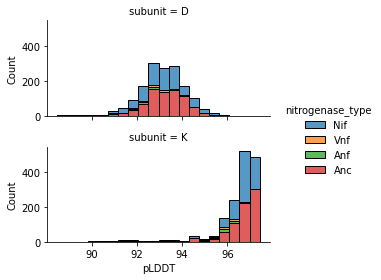

In [25]:
g = sns.displot(
    x='pLDDT', row='subunit', 
    data=chain_plddt, height=2.0, bins=20, aspect=2.0, 
    hue='nitrogenase_type', multiple='stack'
)
g.savefig('../figures/ddkk-histogram-pLDDT.png', dpi=300)
g.savefig('../figures/ddkk-histogram-pLDDT.svg')